In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Segmentação e métodos de detecção de bordas

A detecção de bordas é utilizada para identificar os formatos dos objetos presetes na imagem, o que auxilia na identificação desses objetos.

Nos métodos dessa técnica ocorre a identificação do gradiente (variações abruptas na intensidade dos pixels de uma região da imagem).

Há no opencv 3 filtros de gradientes (filtros passa-alta): Sobel (**cv2.Sobel()**), Scharr (**cv2.Scharr()**) e Laplacian (**cv2.Laplacian()**).

### Sobel

no **Sobel** é necessário juntar o filtro horizontal e o vertical para obter a transformação completa. É necessário trabalhar a imagem com ponto flutuante de 64 bits (que suporta valores negativos e positivos) e depois converter para uint8.

In [2]:
img = cv2.imread('../img/ponte.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)
resultado = np.vstack([
    np.hstack([img, sobelX]),
    np.hstack([sobelY, sobel])
])
cv2.imshow('sobel', resultado)
cv2.waitKey(0)

-1

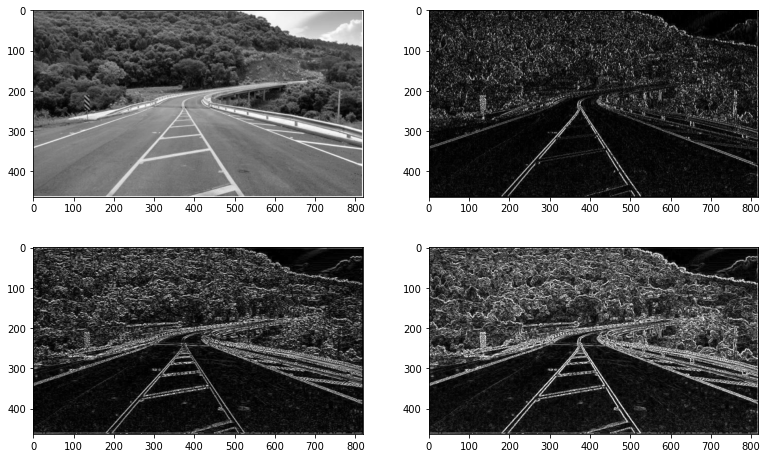

In [3]:
plt.figure(figsize=(13, 8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.subplot(2,2,2), plt.imshow(sobelX, cmap='gray')
plt.subplot(2,2,3,), plt.imshow(sobelY, cmap='gray')
plt.subplot(2,2,4), plt.imshow(sobel, cmap='gray')

plt.show()

### Laplaciano

Também é necessário trabalhar com a representação do pixel em ponto flutuante de 64 bits com sinal para depois converter de volta a uint8.

In [4]:
lap = cv2.Laplacian(img, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
resultado = np.vstack([img, lap])
cv2.imshow('filtro laplaciano', resultado)
cv2.waitKey(0)

-1

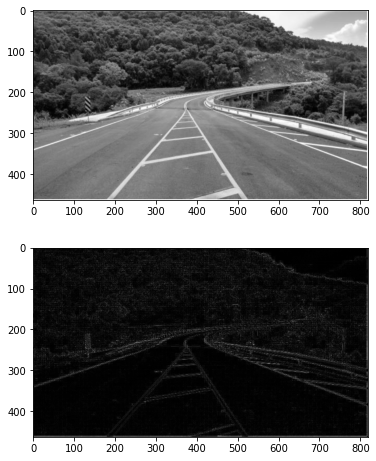

In [6]:
plt.figure(figsize=(6, 8))
plt.subplot(2,1,1), plt.imshow(img, cmap='gray')
plt.subplot(2,1,2), plt.imshow(lap, cmap='gray')

plt.show()

### Detector de bordas Canny

Utiliza técnicas como o Sobel e realiza múltiplos passos para chegar ao resultado final. Envolve:

1. Aplicar um filtro gaussiano para suavizar a imagem e remover o ruído;
2. Encontrar os gradientes de intensidade da imagem;
3. Aplicar Sobel duplo para determinar bordas potenciais;
4. Aplicar o processo de hysteresis para verificar se o pixel faz parte de uma borda forte, suprimindo todas as outras bordas que são fracas e não conectadas a bordas fortes.

**cv2.Canny()**: Parâmetros:
* limiar 1: qualquer valor inferior a ele não é considerado uma borda.
* limiar 2: qualquer valor superior a ele é considerado uma borda.

Valores entre o limiar 1 e 2 são classificados como borda ou não borda com base em como eles estão conectados.

In [8]:
suave = cv2.GaussianBlur(img, (7,7), 0)
canny1 = cv2.Canny(suave, 20, 120)
canny2 = cv2.Canny(suave, 70, 200)
resultado = np.vstack([
    np.hstack([img, suave]),
    np.hstack([canny1, canny2])
])
cv2.imshow('detector de bordas canny', resultado)
cv2.waitKey(0)

-1

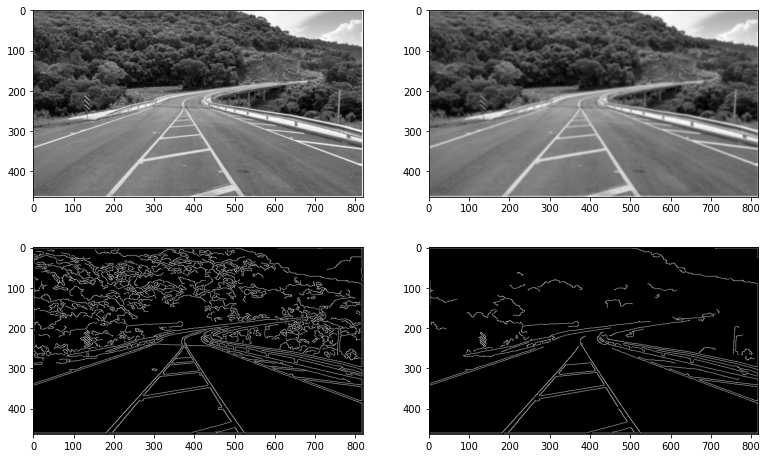

In [9]:
plt.figure(figsize=(13, 8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.subplot(2,2,2), plt.imshow(suave, cmap='gray')
plt.subplot(2,2,3,), plt.imshow(canny1, cmap='gray')
plt.subplot(2,2,4), plt.imshow(canny2, cmap='gray')

plt.show()